In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [1]:
import sys
print(sys.version)

3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]


In [2]:
#import tensorflow as ts
#from tensorflow import keras as ka

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
test_datagen=ImageDataGenerator(
    rescale=1./255, #.1 in order to 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
train_set = train_datagen.flow_from_directory (
    r'D:\Hariharan\Desktop\imarticus\horse-or-human',\
    target_size=(64, 64),\
    batch_size=32,\
    class_mode='binary')


Found 1027 images belonging to 2 classes.


In [7]:
test_set = train_datagen.flow_from_directory (
    r'D:\Hariharan\Desktop\imarticus\validation-horse-or-human',\
    target_size=(64, 64),\
    batch_size=32,\
    class_mode='binary')

Found 256 images belonging to 2 classes.


## Create Convolution Model

In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(filters=10,kernel_size=(3,3), activation='relu',padding="same",input_shape=(64,64,3)))
# model.add(MaxPooling2D(pool_size=2)) 
# model.add(Flatten())

model.add(Conv2D(filters=10,kernel_size=3,activation='relu')) #(60X60X10)
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

# model.add(Conv2D(filters=10,kernel_size=3,activation='relu')) #(58X58X20)
# model.add(Conv2D(filters=80,kernel_size=3,activation='relu')) #(56X56X40)
# model.add(MaxPooling2D(pool_size=2)) # (54X54X80)
# model.add(Flatten())


model.add(Conv2D(filters=10,kernel_size=3,activation='relu')) # (62X62X10)
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 10)        280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 10)       

## ANN over CNN

In [11]:
# model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
# model.add(Dense(units=130,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=120,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=64,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=32,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=16,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))
# model.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 10)        280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 10)       

# Fitting the model

In [13]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 10)        280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 10)       

In [16]:
hist=model.fit_generator(
        train_set,
#         steps_per_epoch=20, # By default 32
        epochs=10,
        validation_data=test_set,
#         validation_steps=30
)


Epoch 1/10
33/33 [==============================] - 8s 228ms/step - loss: 0.6932 - accuracy: 0.5122 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
33/33 [==============================] - 7s 220ms/step - loss: 0.6932 - accuracy: 0.5131 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/10
33/33 [==============================] - 7s 213ms/step - loss: 0.6925 - accuracy: 0.5131 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 4/10
33/33 [==============================] - 7s 224ms/step - loss: 0.6879 - accuracy: 0.5131 - val_loss: 0.6553 - val_accuracy: 0.5000
Epoch 5/10
33/33 [==============================] - 8s 236ms/step - loss: 0.6091 - accuracy: 0.6719 - val_loss: 0.9964 - val_accuracy: 0.5000
Epoch 6/10
33/33 [==============================] - 8s 239ms/step - loss: 0.4896 - accuracy: 0.7887 - val_loss: 1.0441 - val_accuracy: 0.5469
Epoch 7/10
33/33 [==============================] - 8s 236ms/step - loss: 0.3965 - accuracy: 0.8364 - val_loss: 0.6154 - val_accuracy: 0.7852
Epoch 

In [17]:
hist.history["accuracy"]

[0.5121714,
 0.5131451,
 0.5131451,
 0.5131451,
 0.6718598,
 0.788705,
 0.8364167,
 0.86562806,
 0.8880234,
 0.8919182]

In [18]:
hist.history["val_accuracy"]

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.546875,
 0.78515625,
 0.71875,
 0.78515625,
 0.91015625]

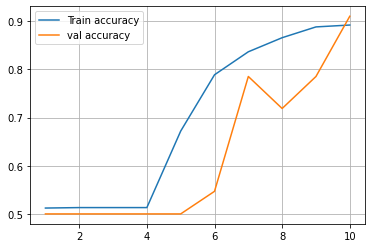

In [19]:
plt.plot(range(1,11),hist.history["accuracy"], label="Train accuracy")



plt.plot(range(1,11),hist.history["val_accuracy"] , label="val accuracy")
plt.legend()
plt.grid()
plt.show()


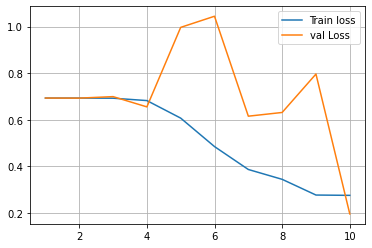

In [20]:
plt.plot(range(1,11),hist.history["loss"], label="Train loss")
plt.plot(range(1,11),hist.history["val_loss"], label="val Loss")
plt.grid()
plt.legend()

# Predicting New Image 

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
new_img=image.load_img(r"D:\Hariharan\Desktop\imarticus\horse(new).jpg")

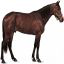

In [23]:
new_img

## Image Conversion to Array

In [24]:
new_img=image.img_to_array(new_img)

In [25]:
new_img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [249., 248., 244.],
        [252., 251., 247.],
        [252., 251., 247.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 251.],
        [236., 237., 232.],
        [255., 255., 253.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [252., 253., 248.],
        [249., 251., 248.],
        [254., 255., 253.]],

       ...,

       [[255., 252., 255.],
        [198., 189., 192.],
        [ 46.,  40.,  42.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[249., 240., 243.],
        [152., 143., 146.],
        [ 40.,  34.,  36.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[255., 248., 251.],
        [234., 225., 228.],
        [203., 1

In [26]:
new_img.shape

(64, 64, 3)

In [27]:
type(new_img)

numpy.ndarray

In [28]:
#image generally is in 4D so we need to change the dimensions of this image

In [29]:
new_img=np.expand_dims(new_img,axis=0)

In [30]:
new_img.ndim

4

In [31]:
new_img.shape

(1, 64, 64, 3)

## Model Testing

In [32]:
pic=model.predict_classes(new_img)

In [33]:
pic

array([[0]])

In [34]:
train_set.class_indices

{'horses': 0, 'humans': 1}

In [35]:
pic[0][0]

0

In [36]:
pic=model.predict(new_img)
if pic[0][0]==0:
    predict=print('This is a Horse')
else:
    predict=print('This is a Human')

This is a Horse


## Testing2 

In [37]:
new_img1=image.load_img(r"D:\Hariharan\Desktop\imarticus\person(1).jpg")

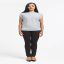

In [38]:
new_img1

## Array Conversion

In [39]:
new_img1=image.img_to_array(new_img1)

In [40]:
new_img1

array([[[245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.],
        ...,
        [243., 243., 245.],
        [243., 243., 245.],
        [243., 243., 245.]],

       [[245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.],
        ...,
        [244., 244., 246.],
        [244., 244., 246.],
        [244., 244., 246.]],

       [[244., 244., 244.],
        [244., 244., 244.],
        [244., 244., 244.],
        ...,
        [244., 244., 246.],
        [244., 244., 246.],
        [244., 244., 246.]],

       ...,

       [[246., 246., 246.],
        [246., 246., 246.],
        [246., 246., 246.],
        ...,
        [247., 247., 247.],
        [247., 247., 247.],
        [247., 247., 247.]],

       [[247., 247., 247.],
        [247., 247., 247.],
        [247., 247., 247.],
        ...,
        [247., 247., 247.],
        [247., 247., 247.],
        [247., 247., 247.]],

       [[246., 246., 246.],
        [246., 246., 246.],
        [246., 2

In [41]:
new_img1.shape

(64, 64, 3)

In [42]:
type(new_img1)

numpy.ndarray

In [43]:
#image generally is in 4D so we need to change the dimensions of this image

In [44]:
new_img1=np.expand_dims(new_img1,axis=0)

In [45]:
new_img1.ndim

4

In [46]:
new_img1.shape

(1, 64, 64, 3)

In [47]:
pic=model.predict_classes(new_img1)

In [54]:
pic

array([[1]])

In [49]:
model.predict(new_img1)

array([[1.]], dtype=float32)

In [50]:
train_set.class_indices

{'horses': 0, 'humans': 1}

In [51]:
pic

array([[1]])

In [52]:
def identify(pic):
    pic
    
    if pic[0][0]==0:
        print("Horse")
    else:
        print("Human")

In [53]:
identify(pic)

Human
